# EDA

## Summary

The goal of the exploratory data analysis was get a general understanding of the data and find observations that could help the modeling. 


## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)

## Import Data

In [3]:
df = pd.read_csv('../data/california.csv', low_memory=False)
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,nwcg_reporting_unit_name,fire_name,complex_name,fire_year,discovery_doy,discovery_time,stat_cause_descr,cont_doy,cont_time,fire_size,fire_size_class,latitude,longitude,state,county,discovery_date,cont_date,discovery_month,discovery_day_of_week,cont_month,cont_day_of_week,discovery_day_of_week_word,cont_day_of_week_word
0,Plumas National Forest,FOUNTAIN,NaN,2005,33,1300.0,Miscellaneous,33.0,1730.0,0.10,A,40.036944,-121.005833,CA,63,2005-02-02,2005-02-02,2,2,2.0,2.0,wednesday,wednesday
1,Eldorado National Forest,PIGEON,NaN,2004,133,845.0,Lightning,133.0,1530.0,0.25,A,38.933056,-120.404444,CA,61,2004-05-12,2004-05-12,5,2,5.0,2.0,wednesday,wednesday
2,Eldorado National Forest,SLACK,NaN,2004,152,1921.0,Debris Burning,152.0,2024.0,0.10,A,38.984167,-120.735556,CA,17,2004-05-31,2004-05-31,5,0,5.0,0.0,monday,monday
3,Eldorado National Forest,DEER,NaN,2004,180,1600.0,Lightning,185.0,1400.0,0.10,A,38.559167,-119.913333,CA,3,2004-06-28,2004-07-03,6,0,7.0,5.0,monday,saturday
4,Eldorado National Forest,STEVENOT,NaN,2004,180,1600.0,Lightning,185.0,1200.0,0.10,A,38.559167,-119.933056,CA,3,2004-06-28,2004-07-03,6,0,7.0,5.0,monday,saturday


## Understanding the Dataset

The dataset has 189,550 rows and describes fires in California. 

In [4]:
df.shape

(189550, 23)

The 23 features are listed below:

In [5]:
df.columns

Index(['nwcg_reporting_unit_name', 'fire_name', 'complex_name', 'fire_year',
       'discovery_doy', 'discovery_time', 'stat_cause_descr', 'cont_doy',
       'cont_time', 'fire_size', 'fire_size_class', 'latitude', 'longitude',
       'state', 'county', 'discovery_date', 'cont_date', 'discovery_month',
       'discovery_day_of_week', 'cont_month', 'cont_day_of_week',
       'discovery_day_of_week_word', 'cont_day_of_week_word'],
      dtype='object')

10 out of the 23 features have null values. The categories with missing values are fire and complex name, discovery time, any information on containment, and county. It makes sense that not all fires have a name or are part of a complex. Additionally, not all fires will have an exact discovery time or a definitive containment time. Small fires do not require this granular information. 

I will these fields in the dataframe for now in case they prove useful for modeling. If they do not help the model then I will remove those features.

In [6]:
df.isnull().sum()

nwcg_reporting_unit_name           0
fire_name                      14995
complex_name                  188623
fire_year                          0
discovery_doy                      0
discovery_time                 79333
stat_cause_descr                   0
cont_doy                       97642
cont_time                      98352
fire_size                          0
fire_size_class                    0
latitude                           0
longitude                          0
state                              0
county                        133329
discovery_date                     0
cont_date                      97642
discovery_month                    0
discovery_day_of_week              0
cont_month                     97642
cont_day_of_week               97642
discovery_day_of_week_word         0
cont_day_of_week_word          97642
dtype: int64

## What types of fires are most common?

For all top three causes of fires are miscellaneous, equipment use, and lightning. Unfortunately, the data dictionary does not describe examples of miscellaneous causes. 

In [7]:
df.stat_cause_descr.value_counts()

Miscellaneous        51943
Equipment Use        39407
Lightning            27000
Arson                19635
Debris Burning       14318
Missing/Undefined    12605
Campfire              9516
Children              6930
Smoking               5936
Powerline             1198
Railroad               720
Fireworks              219
Structure              123
Name: stat_cause_descr, dtype: int64

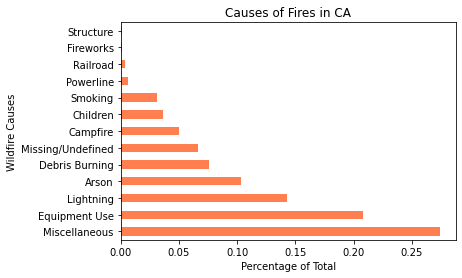

In [8]:
df['stat_cause_descr'].value_counts(normalize=True).plot(kind='barh',color='coral')
plt.title("Causes of Fires in CA")
plt.ylabel('Wildfire Causes')
plt.xlabel('Percentage of Total')
plt.show();


## Where are the locations of fires?

Teh fires are spread across the entire state. Railroad, children and firework caused fires are much more limited than the other categories. 

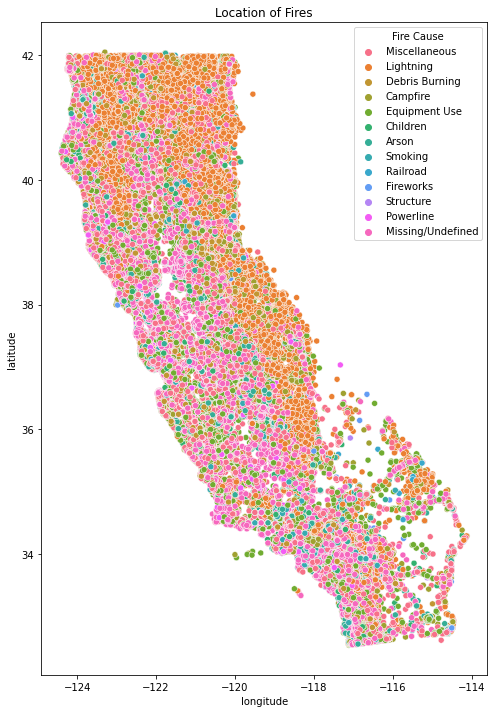

In [36]:
plt.figure(figsize=(8,12))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='stat_cause_descr')
plt.title(f'Location of Fires')
plt.legend(title='Fire Cause')
plt.show();

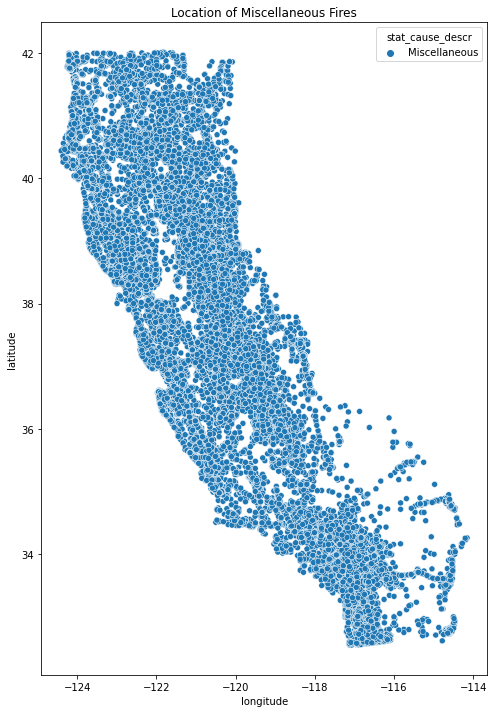

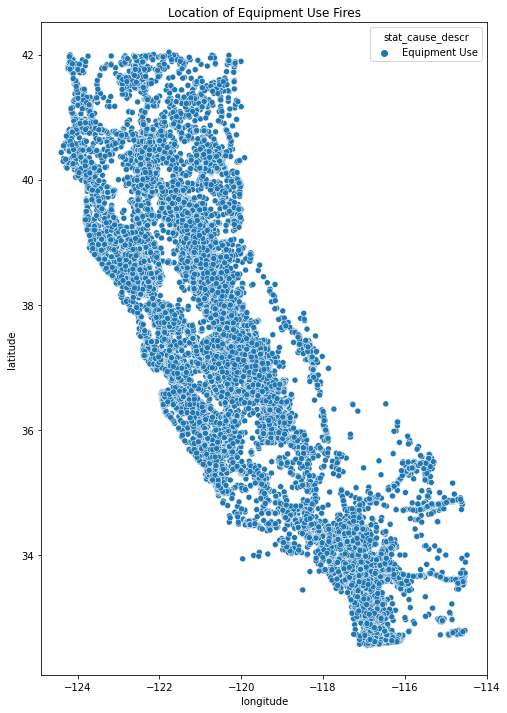

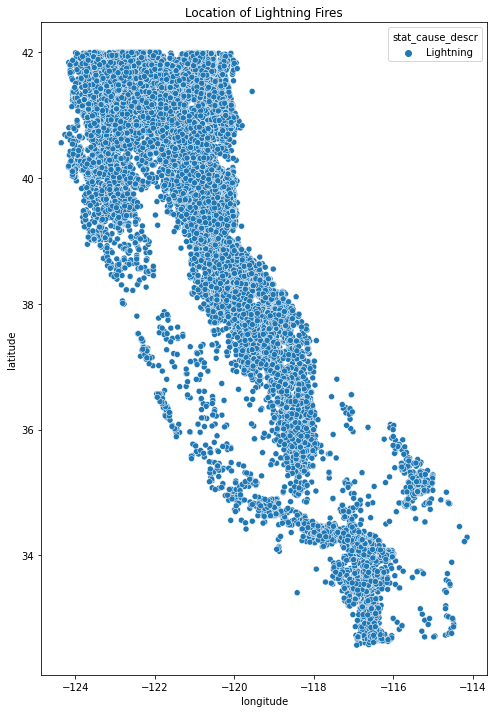

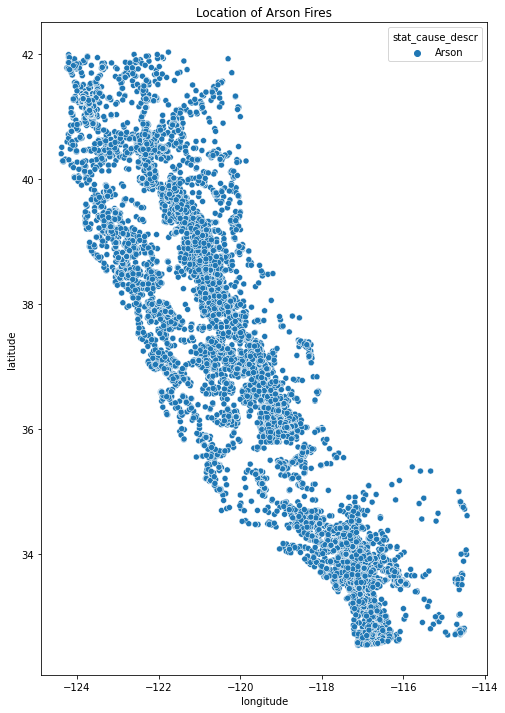

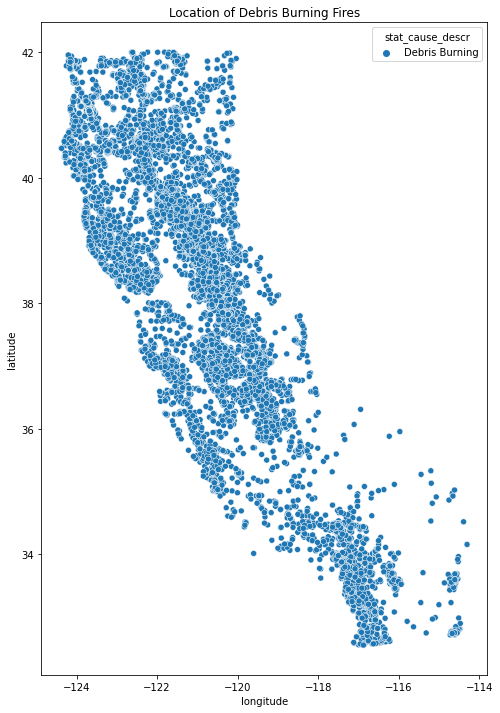

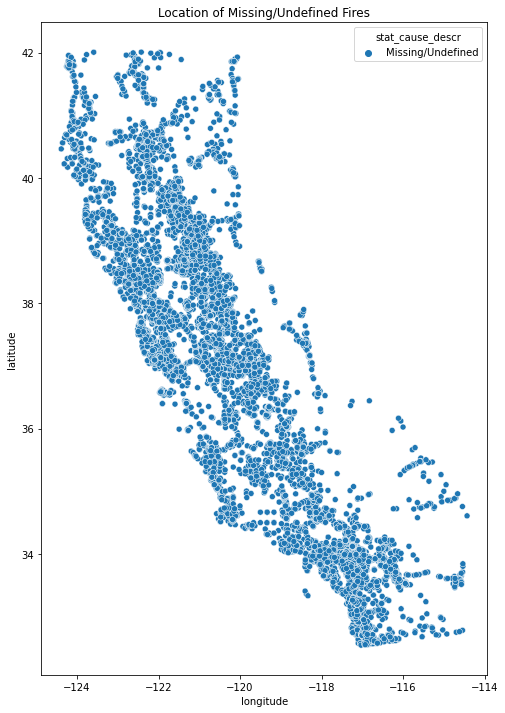

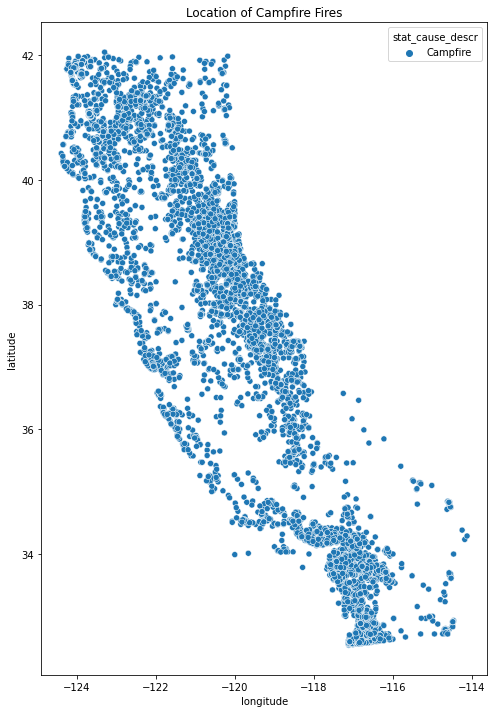

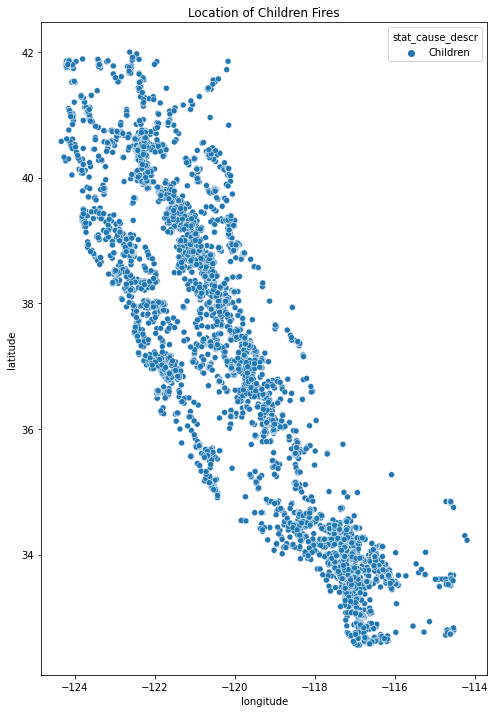

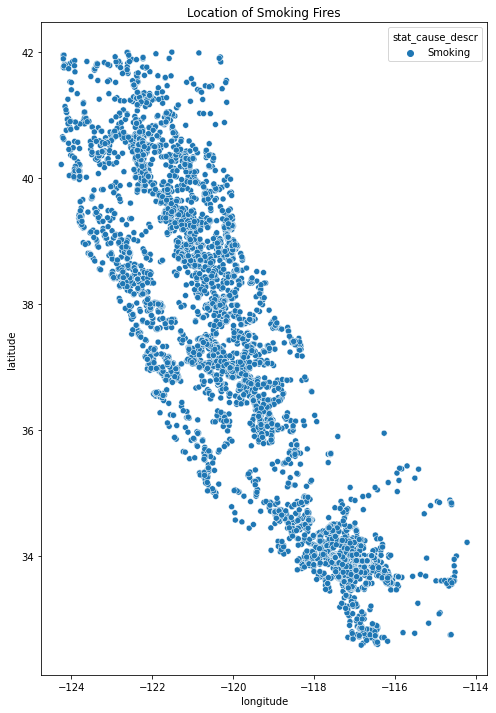

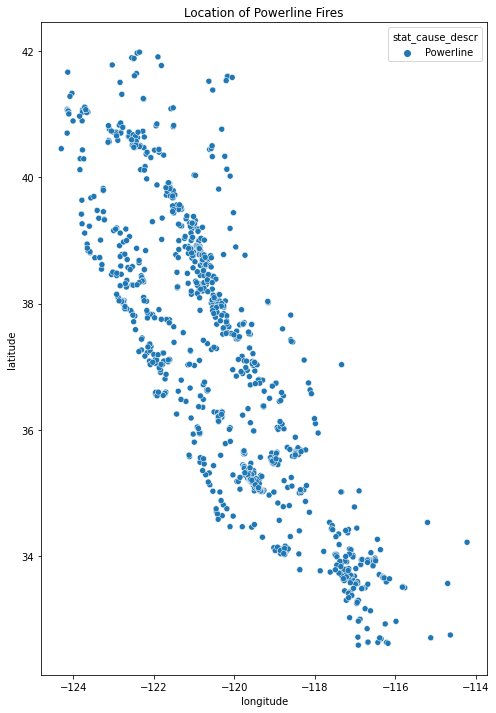

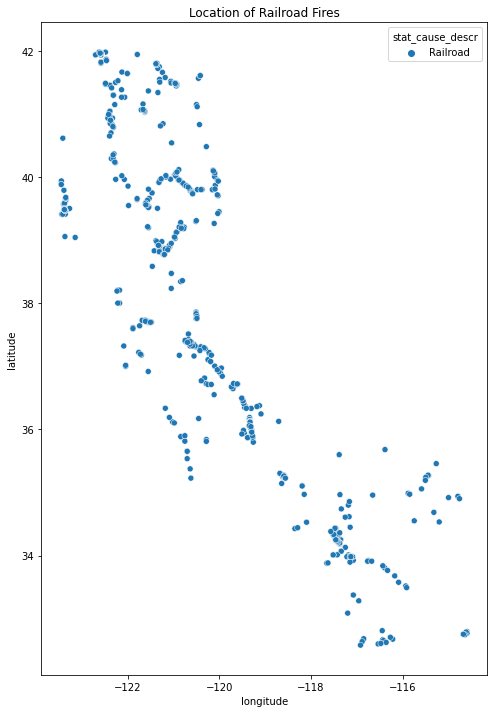

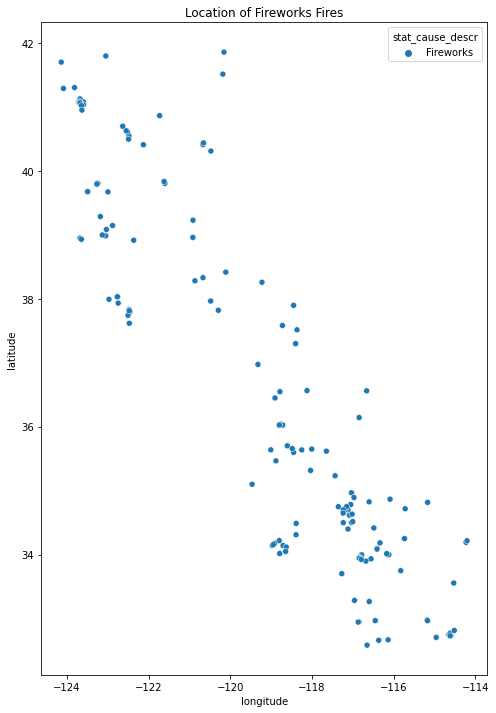

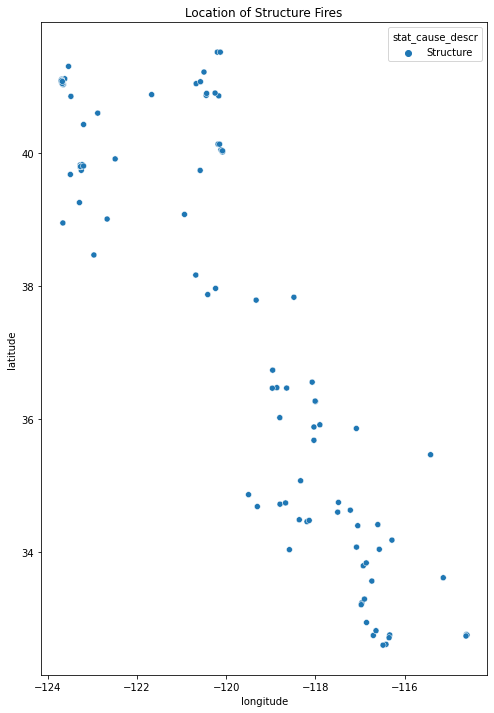

In [9]:
# Created a list of the causes of fires
causes = list(df.stat_cause_descr.value_counts().index)

# For loop plots each cause of fires
for cause in causes:

    mask = df[df['stat_cause_descr'] == cause]
    
    # Plotting each cluster
    plt.figure(figsize=(8,12))
    sns.scatterplot(data=mask, x='longitude', y='latitude', hue='stat_cause_descr')
    plt.title(f'Location of {cause} Fires')
    plt.show();

## Seasonality of Fires

Fires clearly follow a fire season. This confirms general knowledge about fires in California, which are most frequent during the hot and dry months of the summer and fall. The seasonality is seen across all cause categories. 

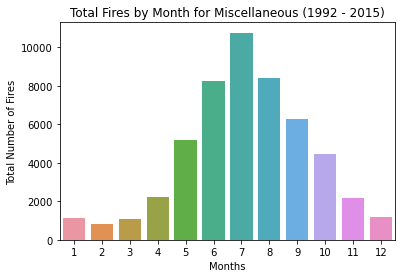

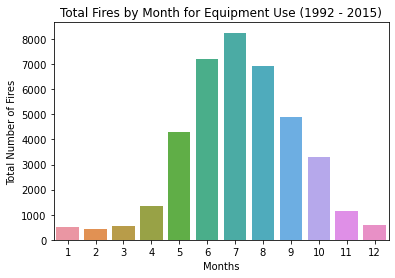

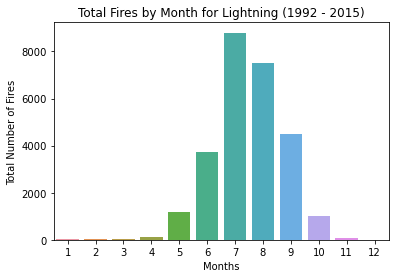

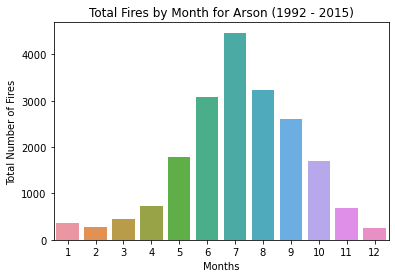

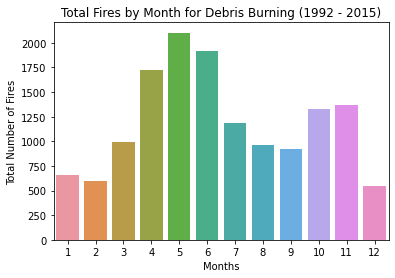

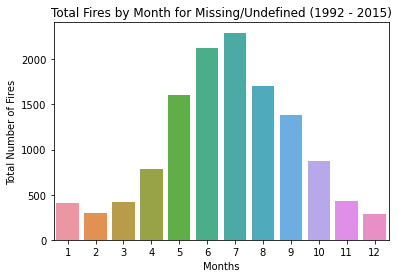

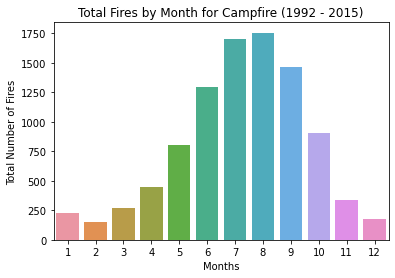

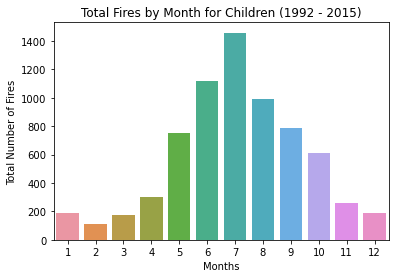

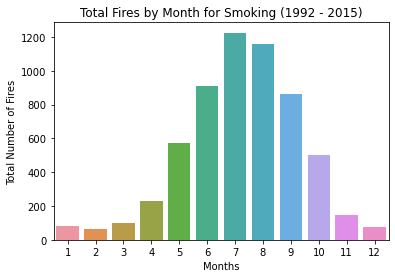

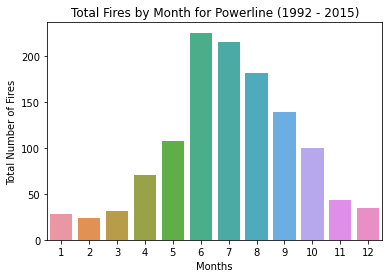

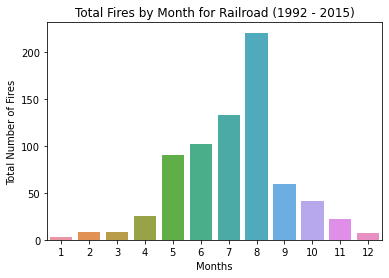

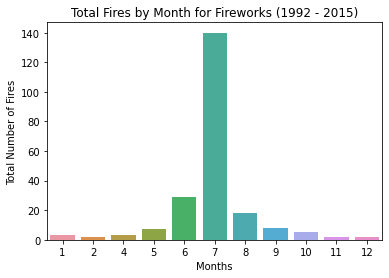

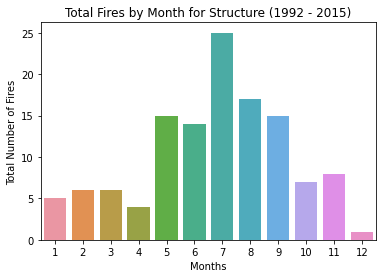

In [10]:
# Created a list of the causes of fires
causes = list(df.stat_cause_descr.value_counts().index)

# For loop plots each cause of fires
for cause in causes:

    mask = df[df['stat_cause_descr'] == cause]

    monthly = mask.groupby('discovery_month').state.count().reset_index()

    sns.barplot(data=monthly, x='discovery_month', y='state')
    plt.title(f'Total Fires by Month for {cause} (1992 - 2015)')
    plt.xlabel('Months')
    plt.ylabel('Total Number of Fires')
    plt.show();

## Fire Season Over Time

''

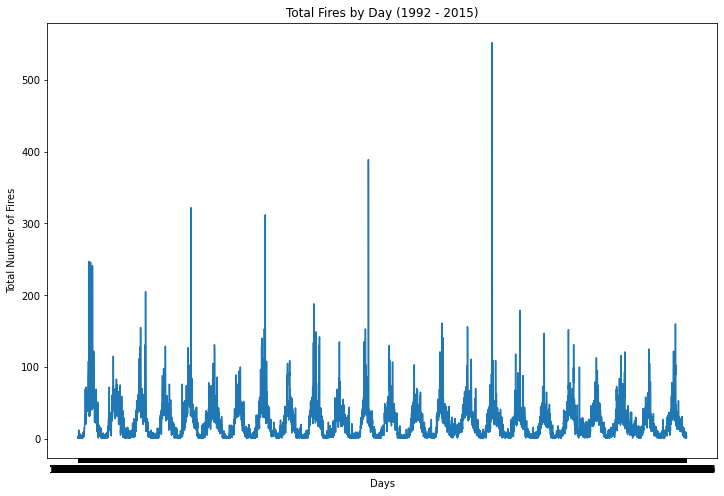

In [11]:
daily = df.groupby('discovery_date').state.count().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=daily, x='discovery_date', y='state')
plt.title('Total Fires by Day (1992 - 2015)')
plt.xlabel('Days')
plt.ylabel('Total Number of Fires')
;

**Prepare Data for Time Series Graphs**

This will allow us to group by daily, weekly, monthly, etc. 

In [12]:
# Create a date column with datetime data format
df['date'] = pd.to_datetime(df.discovery_date)

In [13]:
# Creating a copy of the dataframe
df2 = df.copy()

In [14]:
# grouping fires by date
df2 = df2.groupby('date').state.count().reset_index()

In [15]:
# Setting the date as the index
df2.set_index('date', inplace=True)

In [16]:
# Confirming the index is a date/time
df2.index[0]

Timestamp('1992-01-01 00:00:00')

In [17]:
# Sort the index oldest to newest
df2.sort_index(inplace=True)

In [18]:
# Grouping the fires by time period

daily = df2[['state']].resample('D').mean()

weekly = df2[['state']].resample('W').mean()

monthly = df2[['state']].resample('M').mean()

quarterly = df2[['state']].resample('Q').mean()

In [19]:
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
        
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.show();

In [20]:
# groups = [daily, weekly, monthly, quarterly]

# for group in groups:
# #     print(group)
#     plot_series(group, ['state'], title = 'Fires Over Time - (1992 - 2015)');

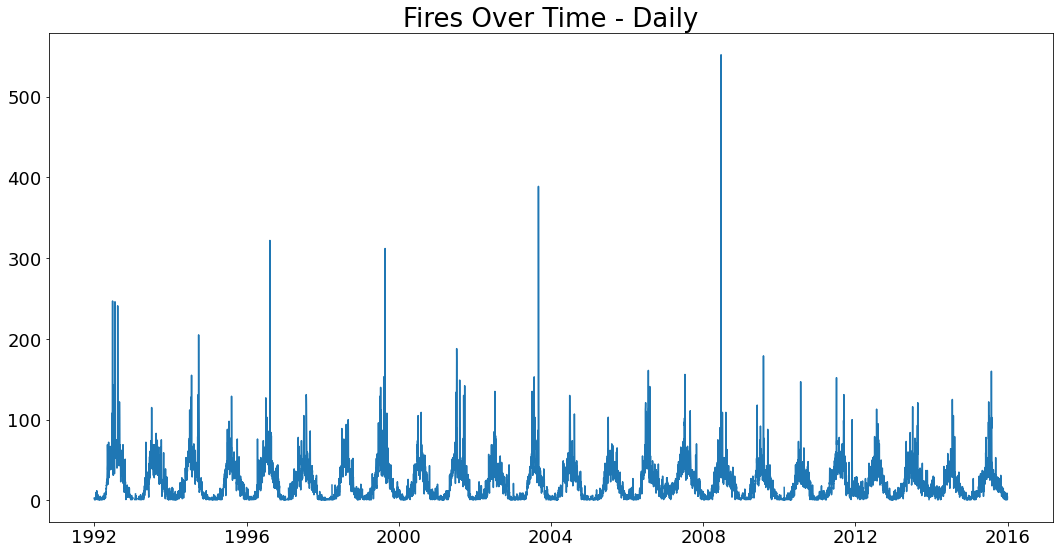

In [21]:
plot_series(daily, ['state'], title = 'Fires Over Time - Daily')

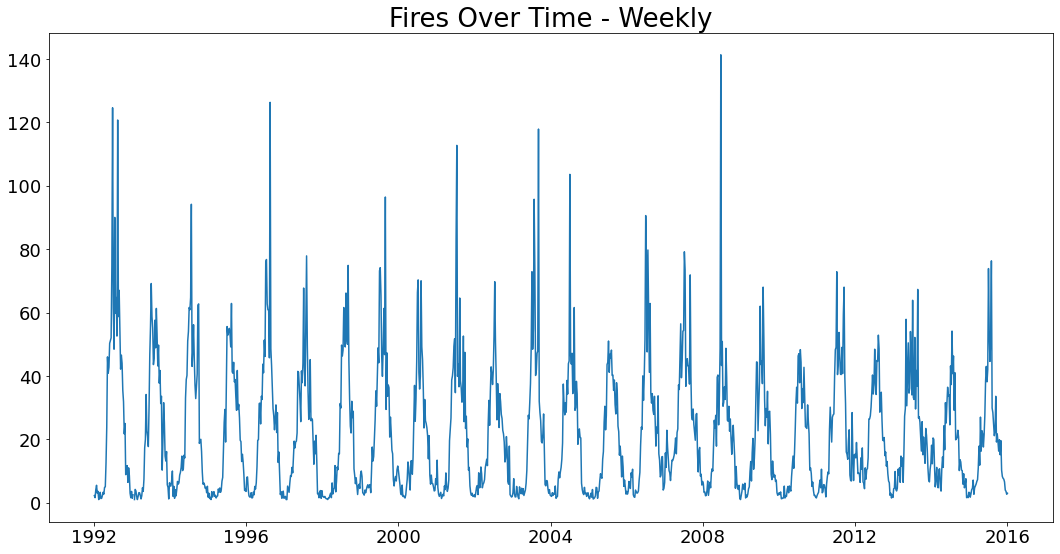

In [22]:
plot_series(weekly, ['state'], title = 'Fires Over Time - Weekly')

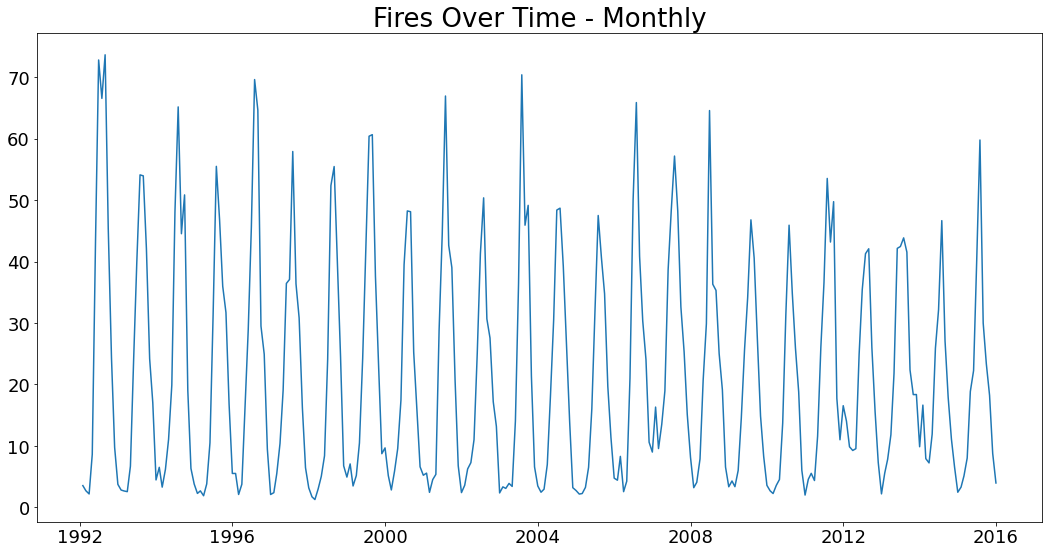

In [23]:
plot_series(monthly, ['state'], title = 'Fires Over Time - Monthly')

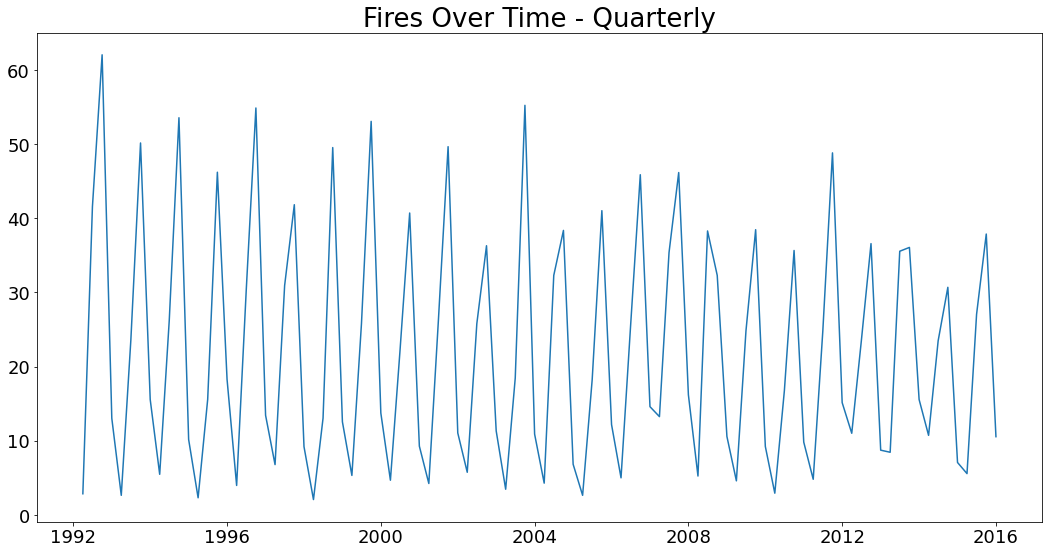

In [24]:
plot_series(quarterly, ['state'], title = 'Fires Over Time - Quarterly')

### Are Fires Discovered on a Certain Day of the Week?

There is some evidence that shows that fires are more frequently discovered on the weekend. It's not an overwhelming majority and is not consistent across all cause categories. 

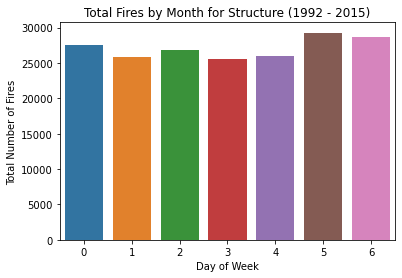

In [25]:

day_week = df.groupby('discovery_day_of_week').state.count().reset_index()

sns.barplot(data=day_week, x='discovery_day_of_week', y='state')
plt.title(f'Total Fires by Month for {cause} (1992 - 2015)')
plt.xlabel('Day of Week')
plt.ylabel('Total Number of Fires')
plt.show();

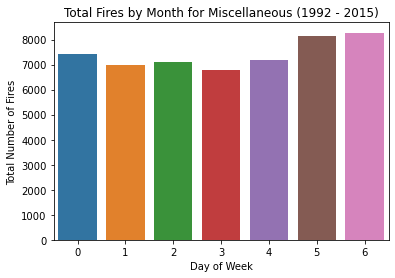

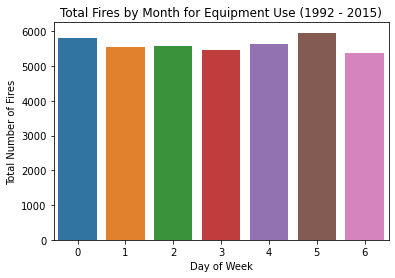

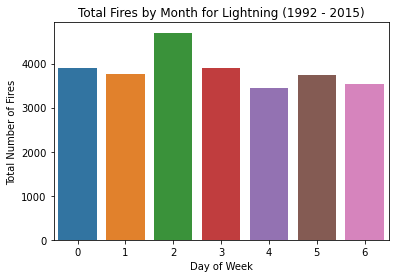

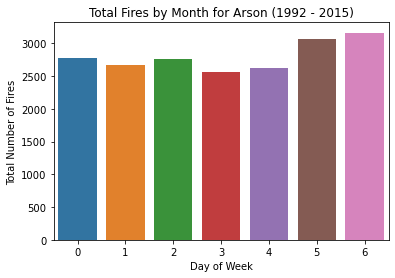

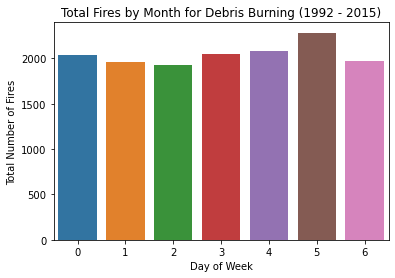

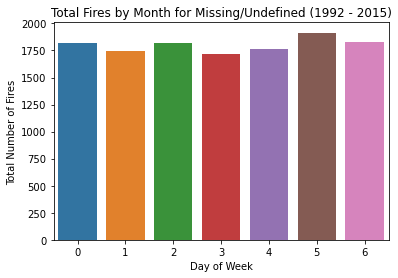

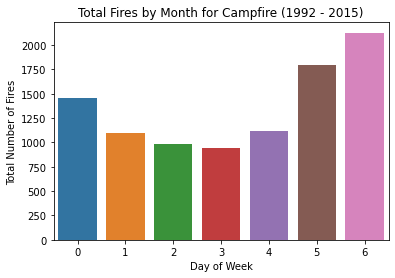

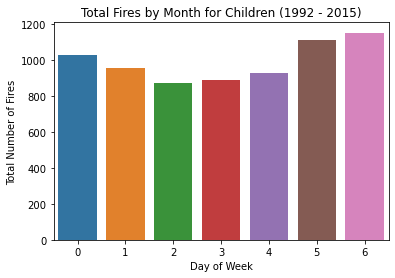

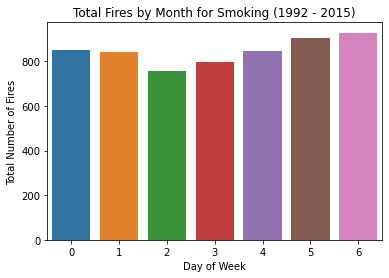

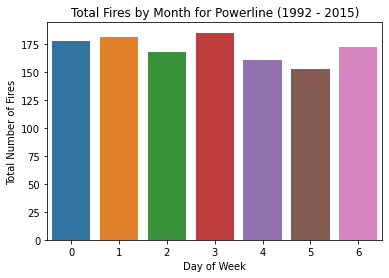

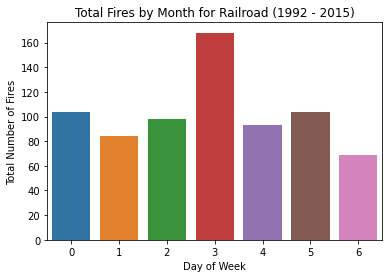

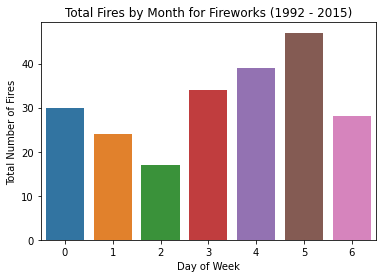

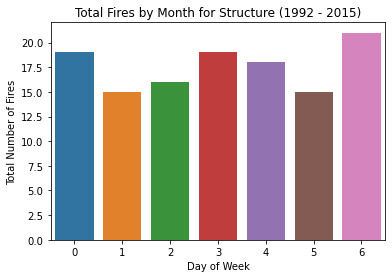

In [26]:
# Created a list of the causes of fires
causes = list(df.stat_cause_descr.value_counts().index)

# For loop plots each cause of fires
for cause in causes:

    mask = df[df['stat_cause_descr'] == cause]

    monthly = mask.groupby('discovery_day_of_week').state.count().reset_index()

    sns.barplot(data=monthly, x='discovery_day_of_week', y='state')
    plt.title(f'Total Fires by Month for {cause} (1992 - 2015)')
    plt.xlabel('Day of Week')
    plt.ylabel('Total Number of Fires')
    plt.show();

## Location of 10 Biggest Fires

The list below shows the 10 biggest wildfires as of December 31, 2015. The miscellaneous caused fires, Witch and Rim, are described in more detail below. Through my research, I discovered that 5 out of the top 6 fires in California history occurred in 2020, which is not included in this dataset. 

In [28]:
top_ten = df.sort_values('fire_size', ascending=False).head(10)
top_ten[['nwcg_reporting_unit_name',
        'fire_name',
        'fire_year',
        'stat_cause_descr',
        'fire_size',
        'latitude',
        'longitude']]

,nwcg_reporting_unit_name,fire_name,fire_year,stat_cause_descr,fire_size,latitude,longitude
156166,Northern California District,RUSH,2012,Lightning,315578.8,40.615300,-120.115300
31041,Cleveland National Forest,CEDAR,2003,Campfire,280059.0,32.985556,-116.727500
162411,Stanislaus National Forest,RIM,2013,Miscellaneous,255858.0,37.860556,-120.083056
4250,Los Padres National Forest,ZACA,2007,Equipment Use,240207.0,34.779167,-120.090000
4499,Cleveland National Forest,WITCH,2007,Miscellaneous,197990.0,33.074444,-116.711111
4809,Los Padres National Forest,BASIN COMPLEX,2008,Lightning,162818.0,36.281111,-121.658333
2360,Los Padres National Forest,DAY,2006,Debris Burning,162702.0,34.632222,-118.769722
7740,Angeles National Forest,STATION,2009,Arson,160371.0,34.242500,-118.188889
176054,Sierra National Forest,ROUGH,2015,Lightning,151623.0,36.873611,-118.904722
29038,Sequoia National Forest,MCNALLY,2002,Campfire,150696.0,35.873611,-118.458056


According to prosecutors, Emerald was on a solo hunting trip in the Clavey River drainage of the Stanislaus National Forest on Aug. 17, 2013, when he lit a campfire to heat soup, and the wind carried embers uphill into bone-dry brush that ignited.

The Witch Creek Fire started in Witch Creek Canyon near Santa Ysabel, at 12:35 PM PDT on Sunday, October 21, 2007, after powerful Santa Ana winds blew down a power line, releasing sparks into the wind

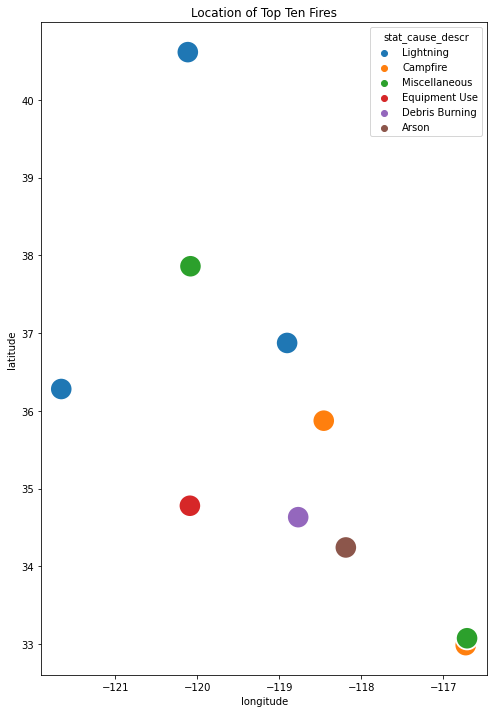

In [29]:
plt.figure(figsize=(8,12))
sns.scatterplot(data=top_ten, x='longitude', y='latitude', hue='stat_cause_descr', s=500)
plt.title(f'Location of Top Ten Fires')
plt.show();